# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Adrian Sanjaya
- **Email:** sanjayaadrian77@gmail.com
- **ID Dicoding:** adrian_sanjaya_wXxl

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi peminjaman sepeda per bulan pada tahun 2011 ?
- Pada jam berapa peminjaman sepeda paling banyak  di tahun 2012 ?
- Apa hubungan cuaca dengan jumlah peminjaman sepeda ?
- Pada musim apa peminjaman sepeda paling banyak dan paling sedikit dilakukan ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [218]:
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Wrangling

### Gathering Data

Pada tahap gathering data, saya akan melakukan load data berupa day.csv dan hour.csv sebagai main data 

In [219]:
df_day = pd.read_csv("day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [220]:
df_hour = pd.read_csv("hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Melakukan pengecekan tipe data

In [221]:
df_day.info()
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

Pada kedua dataset terdapat kesalahan tipe data pada column dteday dengan tipe data object, seharusnya memiliki tipe data datetime

#### Melakukan pengecekan missing value

In [222]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [223]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing value pada kedua dataset

#### Melakukan pengecekan duplicate data

In [224]:
print("Jumlah duplikasi data: ", df_day.duplicated().sum())
print("Jumlah duplikasi data: ", df_hour.duplicated().sum())

Jumlah duplikasi data:  0
Jumlah duplikasi data:  0


Tidak terdapat duplikasi data pada kedua dataset

#### Melakukan pengecekan nilai statistik

In [225]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [226]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terdapat kejanggalan pada kedua dataset

### Cleaning Data

#### Melakukan perubahan tipe data

In [227]:
# Merubah tipe data dteday dari object ke datetime
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

print("dteday on df_day : ", df_day['dteday'].dtypes)
print("dteday on df_hour : ", df_hour['dteday'].dtypes)

dteday on df_day :  datetime64[ns]
dteday on df_hour :  datetime64[ns]


In [228]:
# Merubah tipe data int ke category sesuai kebutuhan analisis
columns = ["yr", "mnth", "season", "weathersit"]
 
for column in columns:
    df_day[column] =  df_day[column].astype("category")
    df_hour[column] =  df_hour[column].astype("category")

#### Melakukan perubahan isi kolom

In [270]:
# Merubah isi kolom, dari angka menjadi keterangan sesuai kebutuhan analisis agar lebih mudah dibaca
# Merubah isi pada kolom yr
df_day.yr.replace({0:'2011', 1:'2012'}, inplace=True)
df_hour.yr.replace({0:'2011', 1:'2012'}, inplace=True)

# Merubah isi pada kolom mnth
df_day.mnth.replace({1:'Jan', 2:'Feb', 3:'Mar' , 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)
df_hour.mnth.replace({1:'Jan', 2:'Feb', 3:'Mar' , 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

# Merubah isi pada kolom season
df_day.season.replace({1:'Spring',2:'Summer', 3:'Fall', 4: 'Winter'}, inplace=True)
df_hour.season.replace({1:'Spring',2:'Summer', 3:'Fall', 4: 'Winter'}, inplace=True)

# Merubah isi pada kolom weathersit
df_day.weathersit.replace({1:'Clear', 2:'Misty',3:'Light_snow', 4:'Heavy_rain'}, inplace=True)
df_hour.weathersit.replace({1:'Clear', 2:'Misty',3:'Light_snow', 4:'Heavy_rain'}, inplace=True)

## Exploratory Data Analysis (EDA)

### Explore df_day

In [230]:
df_day[df_day["yr"] == "2011"].groupby(by="mnth").agg({
    "cnt": ["max", "min", "mean", "sum"]
})

cnt                           
       max   min         mean     sum
mnth                                 
Jan   1985   431  1231.903226   38189
Feb   2927  1005  1721.964286   48215
Mar   3239   605  2065.967742   64045
Apr   5312   795  3162.333333   94870
May   5805  2633  4381.322581  135821
Jun   5515  3767  4783.733333  143512
Jul   6043  3285  4559.387097  141341
Aug   5895  1115  4409.387097  136691
Sep   5423  1842  4247.266667  127418
Oct   5511   627  3984.225806  123511
Nov   4486  1495  3405.566667  102167
Dec   3940   705  2816.870968   87323

Pada tabel di atas menunjukkan nilai maximum, minimum, mean, dan total peminjaman sepeda setiap bulan di tahun 2011 dengan total peminjaman sepeda tertinggi pada bulan Juni dan  terendah pada bulan Januari

In [231]:
df_day.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index()

,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Pada tabel di atas menunjukkan jumlah peminjaman sepeda pada musim tertentu, dimana peminjaman sepeda paling banyak dilakukan pada musim fall

In [232]:
df_day.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean", "sum"]
}).sort_values(by=("cnt", "sum"), ascending=False).reset_index()

weathersit   cnt                           
                max  min         mean      sum
0       Clear  8714  431  4876.786177  2257952
1       Misty  8362  605  4035.862348   996858
2  Light_snow  4639   22  1803.285714    37869

Pada tabel diatas dapat dilihat bahwa peminjaman sepeda banyak dilakukan ketika cuaca clear atau misty. Sedangkan pada kondisi cuaca light snow, peminjaman sepeda sangat amat rendah

### Explore df_hour

In [233]:
df_hour[df_hour["yr"] == "2012"].groupby(by="hr").agg ({
    "cnt": ["sum"]
})

,cnt
,sum
hr,
0,23590
1,14606
2,9691
3,4733
4,2611
5,9104
6,34331
7,97241


Berdasarkan hasil pivot table, kondisi peminjaman sepeda di tahun 2011 paling banyak pada jam 20.00 dengan nilai 209228 dan peminjaman sepeda  paling sedikit pada jam 04.00 dengan nilai 2611

## Visualization & Explanatory Analysis

### Pertanyaan 1:

#### Bagaimana distribusi peminjaman sepeda per bulan pada tahun 2011 ?

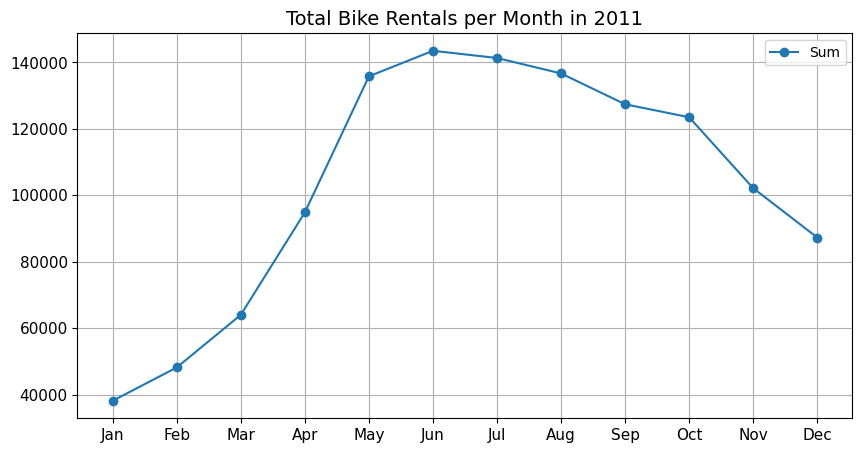

In [269]:
filtered_df = df_day[df_day["yr"] == "2011"].groupby(by="mnth").agg({
    "cnt": "sum"
})

plt.figure(figsize=(10, 5))
plt.plot(filtered_df.index, filtered_df["cnt"], label="Sum", marker="o")
plt.title("Total Bike Rentals per Month in 2011", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid()
plt.legend()
plt.show()

Berdasarkan diagram yang ditampilkan di atas, dapat ditarik kesimpulan bahwa sepanjang tahun 2011, distribusi peminjaman sepeda menunjukkan peningkatan yang cukup signifikan mulai dari bulan Januari hingga mencapai puncaknya pada bulan Juni. Setelah bulan Juni, terlihat adanya penurunan secara bertahap dalam jumlah peminjaman sepeda, yang berlanjut hingga akhir tahun, yaitu bulan Desember. Perubahan ini mencerminkan adanya variasi musiman yang mempengaruhi pola peminjaman sepeda selama tahun tersebut.

### Pertanyaan 2:

#### Pada jam berapa peminjaman sepeda paling banyak  di tahun 2012 ?

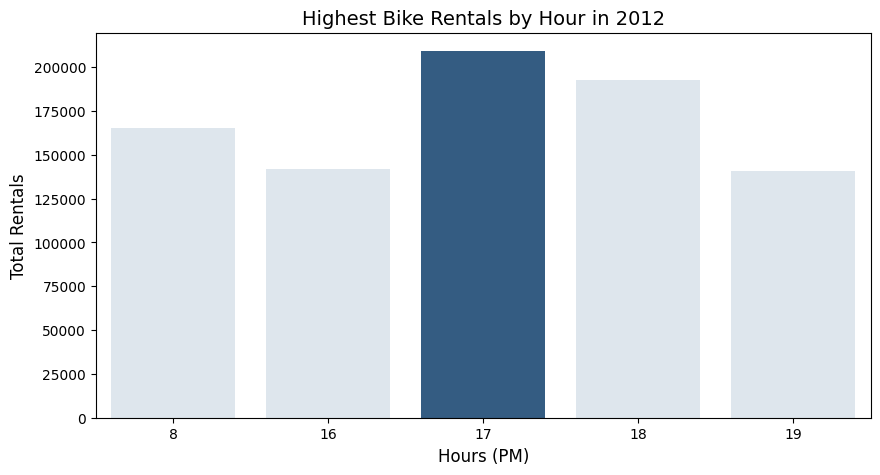

In [244]:
filtered_df = df_hour[df_hour["yr"] == "2012"].groupby("hr").agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False).reset_index()
top_5 = filtered_df.nlargest(5, 'cnt')

plt.figure(figsize=(10, 5))
sns.barplot(x="hr", y="cnt", data=top_5, palette= ["#DBE6F0", "#DBE6F0", "#275C8F", "#DBE6F0", "#DBE6F0"])
plt.title("Highest Bike Rentals by Hour in 2012", fontsize=14)
plt.xlabel("Hours (PM)", fontsize=12)
plt.ylabel("Total Rentals", fontsize=12)
plt.show()


Berdasarkan diagram batang yang ditampilkan di atas, dapat disimpulkan bahwa pada tahun 2012, peminjaman sepeda paling banyak terjadi pada pukul 17.00. Waktu ini mencerminkan lonjakan aktivitas peminjaman yang signifikan dibandingkan dengan jam-jam lainnya, yang kemungkinan besar disebabkan oleh tingginya aktivitas pengguna sepeda pada jam pulang kerja atau kegiatan sore hari. Tren ini menunjukkan bahwa peminjaman sepeda mencapai puncaknya di sore hari, ketika banyak orang memanfaatkan sepeda sebagai sarana transportasi setelah beraktivitas sepanjang hari.

### Pertanyaan 3:

#### Apa hubungan cuaca dengan jumlah peminjaman sepeda ?

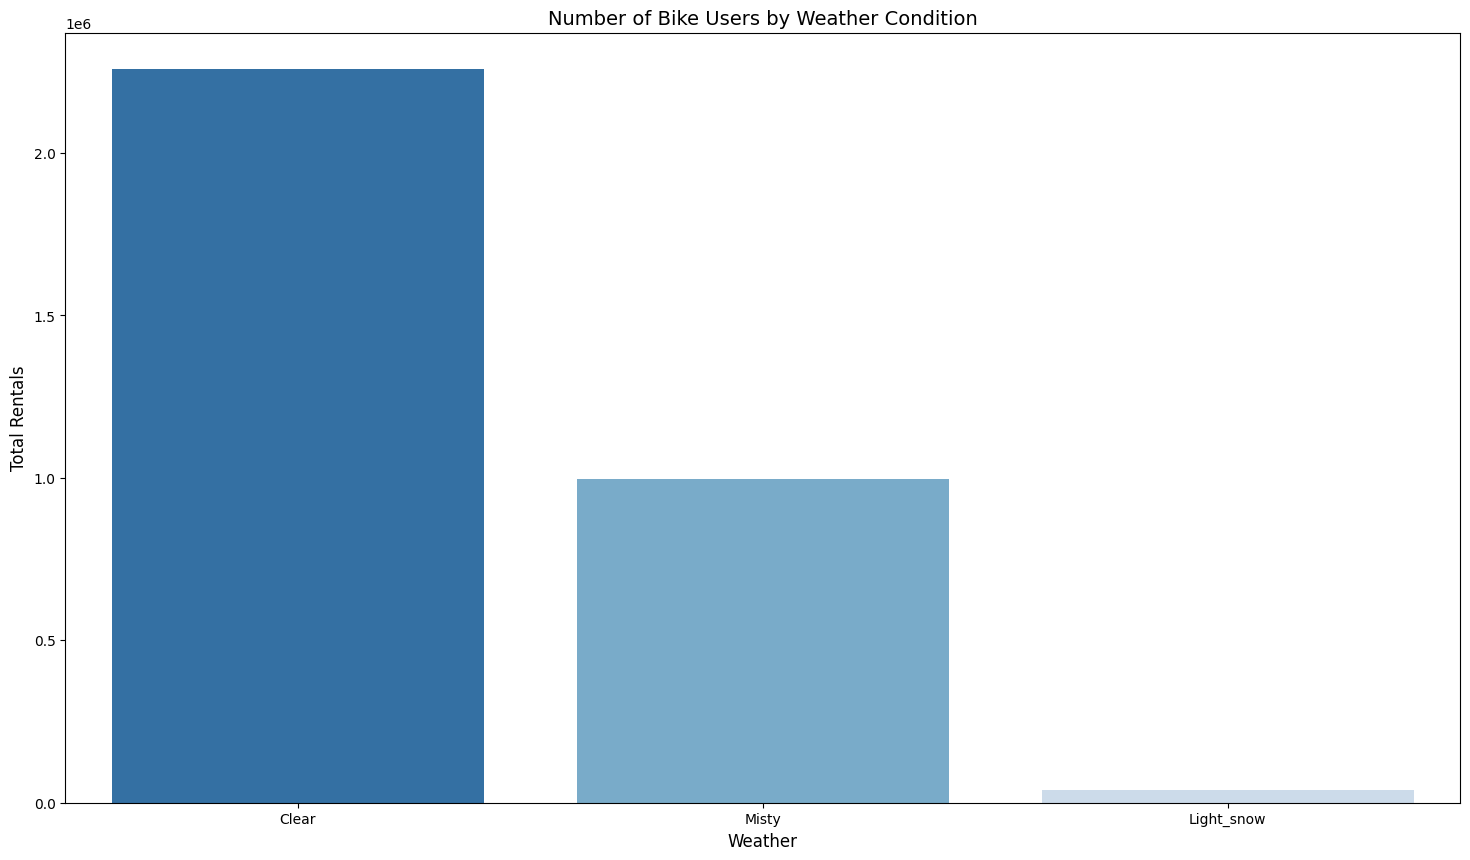

In [261]:
filtered_df = df_day.groupby(by="weathersit").agg({
    "cnt": ["sum"]
}).reset_index()

plt.figure(figsize=(18, 10))
sns.barplot(
    x="weathersit",
    y=("cnt", "sum"),
    palette="Blues_r",
    data=filtered_df
)

plt.title("Number of Bike Users by Weather Condition", fontsize=14)
plt.xlabel("Weather", fontsize=12)
plt.ylabel("Total Rentals", fontsize=12)
plt.show()


Berdasarkan diagram batang yang ditampilkan di atas, dapat disimpulkan bahwa terdapat hubungan yang berbanding lurus antara kondisi cuaca dan jumlah peminjaman sepeda. Ketika cuaca cerah, jumlah peminjaman sepeda meningkat secara signifikan, menunjukkan nilai yang sangat tinggi. Sebaliknya, saat cuaca tidak cerah atau kurang mendukung, jumlah peminjaman sepeda cenderung menurun dan memiliki nilai yang lebih rendah. Pola ini mencerminkan bahwa kondisi cuaca secara langsung mempengaruhi minat dan aktivitas peminjaman sepeda oleh pengguna.

### Pertanyaan 4:

#### Pada musim apa peminjaman sepeda paling banyak dan paling sedikit dilakukan ?

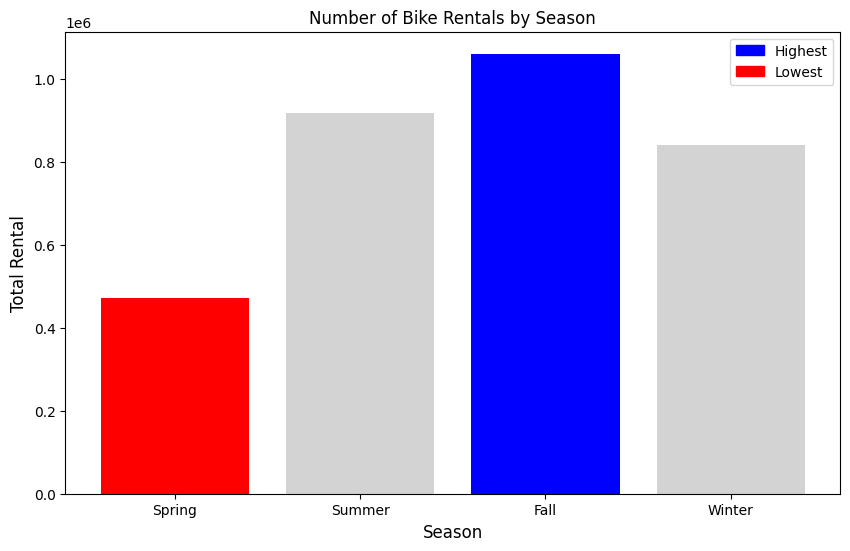

In [262]:
filtered_df = df_day.groupby("season")["cnt"].sum().reset_index()

max_value = filtered_df["cnt"].max()
min_value = filtered_df["cnt"].min()

colors = ["lightgrey" if val != max_value and val != min_value else "blue" if val == max_value else "red" for val in filtered_df["cnt"]]
plt.figure(figsize=(10, 6))
plt.bar(
    filtered_df["season"],
    filtered_df["cnt"],
    color=colors
)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Total Rental", fontsize=12)
plt.title("Number of Bike Rentals by Season")
highest = plt.Rectangle((0,0),1,1, color="blue", label="Highest")
lowest = plt.Rectangle((0,0),1,1, color="red", label="Lowest")
plt.legend(handles=[highest, lowest])
plt.show()

Berdasarkan diagram batang yang ditampilkan di atas, dapat disimpulkan bahwa pelanggan paling banyak melakukan peminjaman sepeda saat memasuki musim gugur (fall), di mana jumlah peminjaman sepeda mencapai puncaknya. Sebaliknya, jumlah peminjaman sepeda paling sedikit terjadi selama musim semi (spring), menunjukkan adanya penurunan aktivitas peminjaman di musim tersebut. Hal ini menggambarkan adanya variasi musiman dalam perilaku pelanggan terkait penggunaan sepeda, dengan musim gugur (fall) menjadi waktu yang paling populer untuk peminjaman, sementara musim semi (spring) menunjukkan aktivitas yang lebih rendah.

## Conclusion

- Conclusion pertanyaan 1: Peminjaman sepeda mengalami peningkatan yang signifikan dari bulan Januari hingga mencapai puncaknya di bulan Juni, kemudian menurun secara bertahap hingga bulan Desember
- Conclusion pertanyaan 2: Peminjaman sepeda paling banyak terjadi pada pukul 17.00, kemungkinan besar karena bertepatan dengan waktu pulang kerja atau aktivitas sore hari
- Conclusion pertanyaan 3: Jumlah peminjaman sepeda berbanding lurus dengan kondisi cuaca. Ketika cuaca cerah, peminjaman sepeda meningkat signifikan, sedangkan ketika cuaca kurang baik, peminjaman sepeda cenderung menurun
- Conclusion pertanyaan 4: Peminjaman sepeda paling banyak dilakukan pada musim gugur (fall), sementara musim semi (spring) menjadi periode dengan peminjaman sepeda paling sedikit

## Analisis Lanjutan

#### RFM Analysis

RFM analysis dilakukan untuk mengklasifikasikan pelanggan berdasarkan pola pembelian mereka dengan mempertimbangkan tiga faktor yaitu:
- Recency: Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian
- Frequency: Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu
- Monetary: Menghitung total pengeluaran pelanggan dalam periode tersebut

In [268]:
date = max(df_hour["dteday"])
df_rfm = df_hour.groupby("registered").agg({
    "dteday": lambda x: (date - x.max()).days, # Recency
    "instant": "count", # Frequency
    "cnt": "sum" # Monetary
}).reset_index()


df_rfm.columns = ['registered', 'Recency', 'Frequency', 'Monetary']
df_rfm.head()

,registered,Recency,Frequency,Monetary
0,0,38,24,35
1,1,0,201,294
2,2,1,245,648
3,3,0,294,1154
4,4,3,307,1602
